In [173]:
import pandas as pd
import numpy as np
import os
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import json
import cufflinks as cf
import seaborn as sns
cf.set_config_file(offline=True)
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import requests
import plotly.tools as tls
import plotly.figure_factory as ff

In [174]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplo

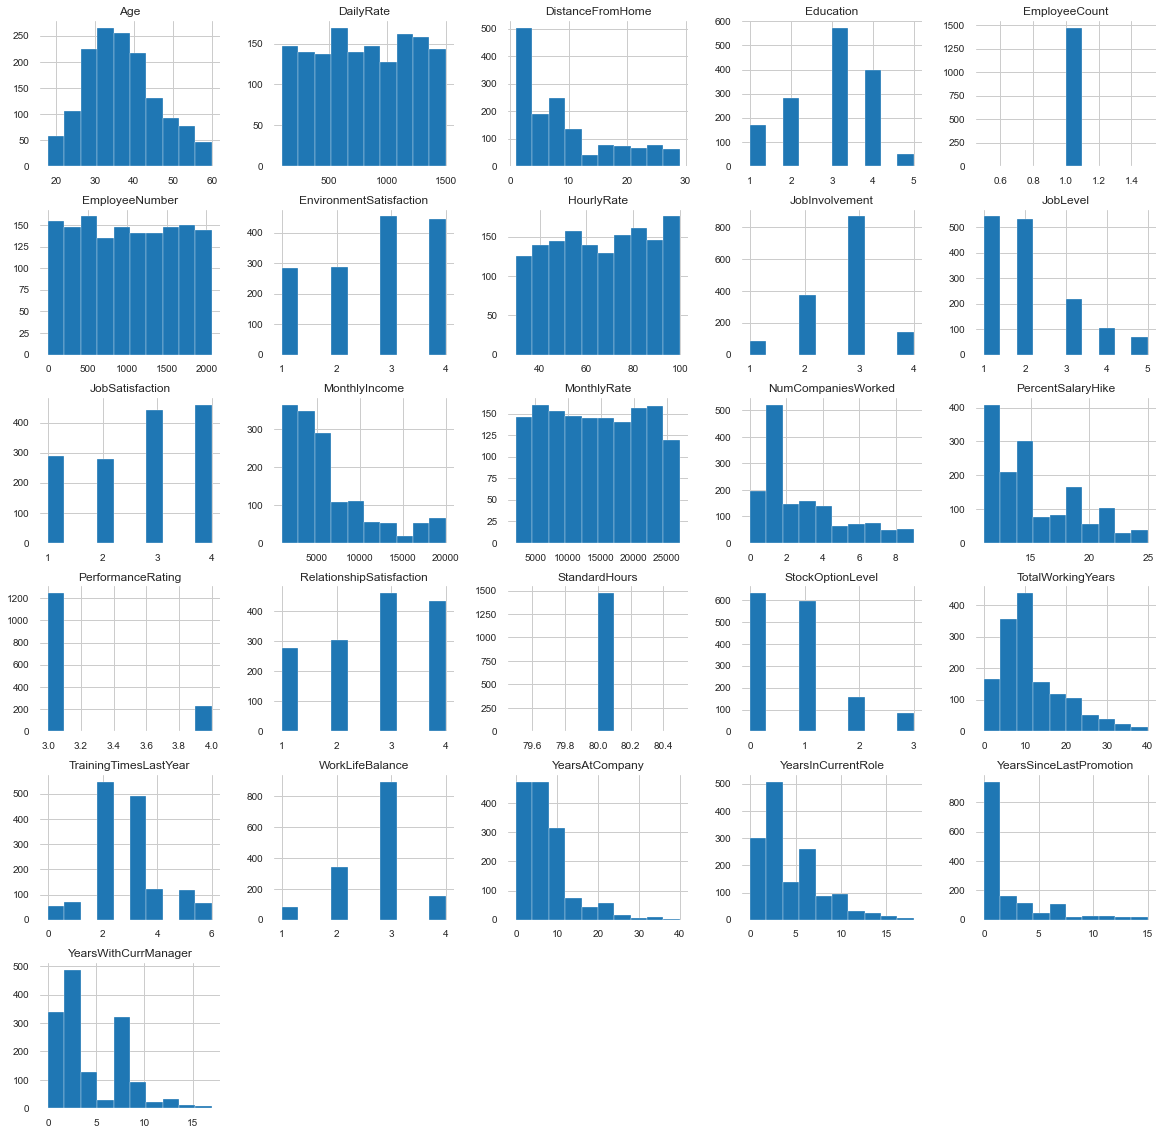

In [176]:
df.hist(figsize=(20,20));

In [177]:
print(df['JobSatisfaction'].value_counts())
print('')
print(df['RelationshipSatisfaction'].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


In [178]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [179]:
cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

df_corr = df[cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu', vmax=0.8, vmin=-0.8)
plt.plot();

In [180]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18'])

In [181]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [182]:
df_y = df['JobSatisfaction']

In [183]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [184]:
print(df['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [185]:
count = df['Attrition'].value_counts()

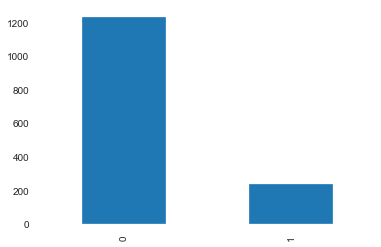

In [186]:
count.plot(kind='bar', x='Attribution')

In [187]:
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], 
               orientation = 'h', marker=dict(color=['red', 'green'], line=dict(color='black',width=1.0)))           

fig = dict(data = [trace])
py.iplot(fig)

In [188]:
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=10), marker=dict(colors=['green','red'], line=dict(color='black', width=1.0)))
fig = dict(data = [trace])
py.iplot(fig)

In [189]:
def plot_distribution(variable, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[variable])
    corr = np.round(corr,3)
    tmp1 = attrition[variable]
    tmp2 = no_attrition[variable]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['red', 'blue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = variable+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [190]:
def barplot(variable, no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[variable],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['blue','red' ]
    trace1 = go.Bar(
        x=tmp1[variable].value_counts().keys().tolist(),
        y=tmp1[variable].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='red',
        line=dict(color='black',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[variable].value_counts().keys().tolist(),
        y=tmp2[variable].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='blue',
        line=dict(color='black',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='black',width=0.5
        )))

    layout = dict(title =  str(variable),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [191]:
plot_distribution('Age', False)
barplot('Age', False)
plot_distribution('DailyRate', 100)
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)
plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

In [192]:
def plot_pie(variable) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[variable].value_counts().values.tolist(),
                    labels  = attrition[variable].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[variable].value_counts().values.tolist(),
                    labels  = no_attrition[variable].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = variable,
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [193]:
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

In [194]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [195]:
y = df.Attrition

In [196]:
X = df.drop(['Attrition'], axis=True)

In [197]:
X

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                           2  Female  ...                  3   
1                           3    Male  ...                  4   
2                           4    Male  ...                  3   
3                           4  Female  ...                  3   
4                           1    Male  ...                  3   
...                       ...     ...  ...                ...   
1465                        3    Male  ...                  3   
1466                        4    Male  ...                  3   
1467                        2    Male  ...                  4   
1468                        4    Male  ...                  3   
1469                        2    Male  ...                  3   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                            1                 0                 8   
1                            4                 1                10   
2                            2                 0                 7   
3                            3                 0                 8   
4                            4                 1                 6   
...                        ...               ...               ...   
1465                         3                 1                17   
1466                         1                 1                 9   
1467                         2                 1                 6   
1468                         4                 0                17   
1469                         1                 0                 6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                         0               1               6   
1                         3               3              10   
2                         3               3               0   
3                         3               3               8   
4                         3               3               2   
...                     ...             ...             ...   
1465                      3               3               5   
1466                      5               3               7   
1467                      0               3               6   
1468                      3               2               9   
1469                      3               4               4   

     

In [198]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [199]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [200]:
categories = X[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]]
categories.head(10)

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   
5  Travel_Frequently  Research & Development  Life Sciences    Male   
6      Travel_Rarely  Research & Development        Medical  Female   
7      Travel_Rarely  Research & Development  Life Sciences    Male   
8  Travel_Frequently  Research & Development  Life Sciences    Male   
9      Travel_Rarely  Research & Development        Medical    Male   

                     JobRole MaritalStatus OverTime  
0            Sales Executive        Single      Yes  
1         Research Scientist       Married       No  
2      Laboratory Technician        Single      Yes  
3         Research Scientist       Married      Yes  
4      Laboratory Technician       Married       No  
5      Laboratory Technician        Single       No  
6      Laboratory Technician       Married      Yes  
7      Laboratory Technician      Divorced       No  
8     Manufacturing Director        Single       No  
9  Healthcare Representative       Married       No

In [201]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [202]:
categories_encoded = ordinal_encoder.fit_transform(categories)
categories_encoded[10:]

array([[2., 1., 3., ..., 2., 1., 0.],
       [2., 1., 1., ..., 2., 2., 1.],
       [2., 1., 1., ..., 6., 0., 0.],
       ...,
       [2., 1., 1., ..., 4., 1., 1.],
       [1., 2., 3., ..., 7., 1., 0.],
       [2., 1., 3., ..., 2., 1., 0.]])

In [203]:
ordinal_encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [204]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
categories_1hot = cat_encoder.fit_transform(categories)
categories_1hot

<1470x28 sparse matrix of type '<class 'numpy.float64'>'
	with 10290 stored elements in Compressed Sparse Row format>

In [205]:
categories_1hot.toarray()

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [206]:
cat_encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [207]:
num_categories = X.drop(categories, axis=1)
num_categories

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
4      27        591                 2          1               7   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                   4  ...                  3                         1   
1                   2  ...                  4                         4   
2                   3  ...                  3                         2   
3                   3  ...                  3                         3   
4                   2  ...                  3                         4   
...               ...  ...                ...                       ...   
1465                4  ...                  3                         3   
1466                1  ...                  3                         1   
1467                2  ...                  4                         2   
1468                2  ...                  3                         4   
1469                3  ...                  3                         1   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1               6                   4   
1                   3              10                   7   
2                   3               0                   0   
3                   3               8                   7   
4                   3               2                   2   
...               ...             ...                 ...   
1465                3               5                   2   
1466                3               7                   7   
1467                3               6                   2

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [209]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ])

num_categories_tr = num_pipeline.fit_transform(num_categories)

In [210]:
num_attribs = list(num_categories)
cat_attribs = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ])

prepared = full_pipeline.fit_transform(X)

In [277]:
prepared[5]

array([-5.39166258e-01,  5.02053617e-01, -8.87515111e-01, -8.91688250e-01,
       -1.68965156e+00,  1.16978053e+00,  6.45040523e-01,  3.79672129e-01,
       -9.61486392e-01,  1.15325359e+00, -7.29849570e-01, -3.44199283e-01,
       -1.07850444e+00, -6.03910750e-01, -4.26230015e-01,  2.66232577e-01,
       -9.32014389e-01, -4.21642458e-01, -6.20189223e-01, -1.07786213e+00,
       -1.33289967e-03,  7.64997621e-01,  2.52145506e-01,  5.26187736e-01,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00])

In [212]:
y[5]

0

In [229]:
from sklearn.metrics import confusion_matrix

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prepared, y, test_size=0.30, random_state=101)

In [214]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [215]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.83009709, 0.84466019, 0.81067961, 0.84951456, 0.86341463])

In [216]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
sgd_predict = sgd_clf.predict(X_test)

In [222]:
confusion_matrix(y_train, y_train_pred)

array([[796,  66],
       [ 99,  68]])

In [231]:
round_sgd_predict = np.round(sgd_predict).flatten()
print(round_sgd_predict)

[0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [233]:
confusion_matrix(y_test, round_sgd_predict)

array([[334,  37],
       [ 39,  31]])

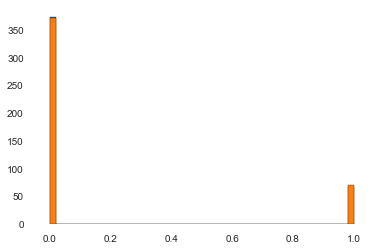

In [246]:
plt.hist(y_test, ec='black', bins=50)
plt.show()

In [281]:
y_test.value_counts()

0    371
1     70
Name: Attrition, dtype: int64

In [301]:
np.unique(round_sgd_predict, return_counts=True)

(array([0, 1]), array([373,  68]))

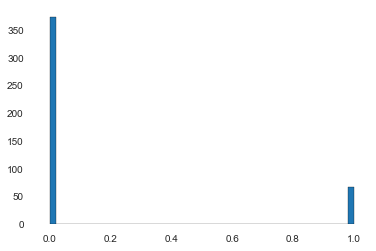

In [248]:
plt.hist(round_sgd_predict, ec='black', bins=50);

In [268]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [258]:
RFC_pred = cross_val_predict(regr, X_test, y_test, cv=3)

In [265]:
RFC_pred = np.round(RFC_pred).flatten()

In [256]:
round_y_pred_RFC = np.round(y_pred).flatten()
print(round_y_pred_RFC)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [263]:
confusion_matrix(y_test, round_y_pred_RFC)

array([[362,   9],
       [ 57,  13]])

In [303]:
y_test.value_counts()

0    371
1     70
Name: Attrition, dtype: int64

In [302]:
np.unique(round_y_pred_RFC, return_counts=True)

(array([0., 1.]), array([419,  22]))

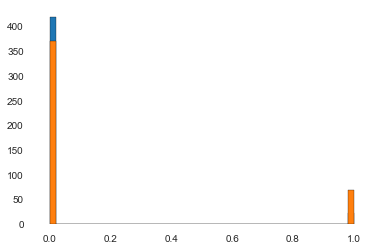

In [264]:
plt.hist(round_y_pred_RFC, ec='black', bins=50)
plt.hist(y_test, ec='black', bins=50)
plt.show()

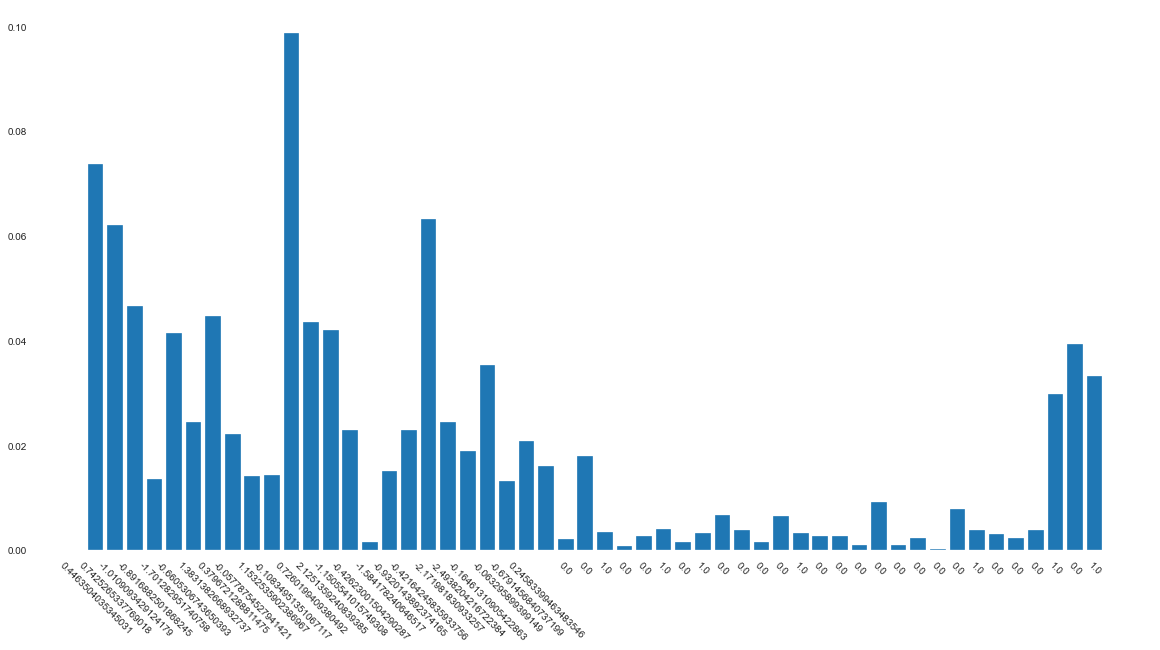

In [279]:
# Code
plt.figure(figsize=(20,10))
importances = regr.feature_importances_
plt.bar(range(len(prepared[0])), importances)

plt.xticks(range(len(prepared[0])), prepared[0], rotation=-45)
plt.show()